In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style='darkgrid', palette='muted')
pd.set_option('display.notebook_repr_html', True)
plt.rcParams['figure.figsize'] = 10, 6
np.random.seed(0)

## Setup de los datos

In [3]:
gte = pd.read_csv('GTExdata.csv', low_memory=False)
labels = pd.read_csv('SampleLabels.csv', low_memory=False)


In [4]:
gte.head()

,-0.81443,-0.1728,-0.13566,4.036,3.4742,0.017055,0.76495,3.0281,0.56595,1.9045,...,-0.88508,-2.2228,-3.0385,-2.8584,-3.4724,-2.5374,-2.9705,-1.8397,-2.1044,-1.9881
0,-1.219500,-0.139670,-0.217330,-1.4361,-0.86158,0.403280,-0.91309,6.9136,4.38540,6.15440,...,2.01310,1.25060,0.333560,0.37651,-0.086984,0.221580,1.205700,0.81913,0.20093,1.371100
1,-0.010044,-0.042155,0.111440,-1.0768,-0.72246,0.651900,-0.79763,5.6678,2.94680,4.63420,...,-1.07800,-0.52936,-0.989140,-3.10870,-3.262500,-1.159200,0.091823,-1.14740,-1.59540,-0.092996
2,-1.336400,-0.088622,-0.126460,-1.7866,-0.99562,0.009797,-1.05550,6.5985,4.22730,6.02260,...,0.67228,0.98691,0.142270,0.34028,-0.129170,0.064783,1.279200,1.05850,0.63342,1.581000
3,-1.055100,-0.065230,-0.087368,-1.4559,-0.69961,0.205960,-0.83905,6.1986,4.05600,5.78430,...,0.48401,0.63014,0.061371,-0.82861,-1.537200,-0.121850,0.735520,0.32366,-0.54558,0.789580
4,-0.538700,-0.184340,-0.266680,-1.8266,-0.79040,0.593780,-0.79899,-1.7453,-0.25312,-0.47961,...,-0.22813,1.03090,1.608100,1.59950,1.478600,2.137100,0.563560,0.11520,-0.21623,0.675090


In [5]:
labels.head()

,Sampleid,Tissue type specific,Tissue type
0,GTEX-N7MS-0007-SM-2D7W1,Whole Blood,Blood
1,GTEX-N7MS-0011-R10A-SM-2HMJK,Brain - Frontal Cortex (BA9),Brain
2,GTEX-N7MS-0011-R11A-SM-2HMJS,Brain - Cerebellar Hemisphere,Brain
3,GTEX-N7MS-0011-R1a-SM-2HMJG,Brain - Hippocampus,Brain
4,GTEX-N7MS-0011-R2a-SM-2HML6,Brain - Substantia nigra,Brain


In [6]:
gte.shape

(1640, 16142)

## Punto 1

### Punto a

In [7]:
from scipy.linalg import svd 
from scipy.sparse.linalg import svds

from scipy.sparse.linalg import eigs

u, s, vt = svd(gte)


In [8]:
singular_values = s

energy_total = sum(singular_values**2)
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)
print(energy_percentage)


[2.38363598e+01 1.72778788e+01 1.28514603e+01 ... 3.34529361e-04
 3.29114813e-04 1.12301264e-06]


In [9]:
acumulated_energy = 0
energy_for_chart = []
for i in range(len(energy_percentage)):
    acumulated_energy = acumulated_energy + energy_percentage[i]
    energy_for_chart.append(acumulated_energy)

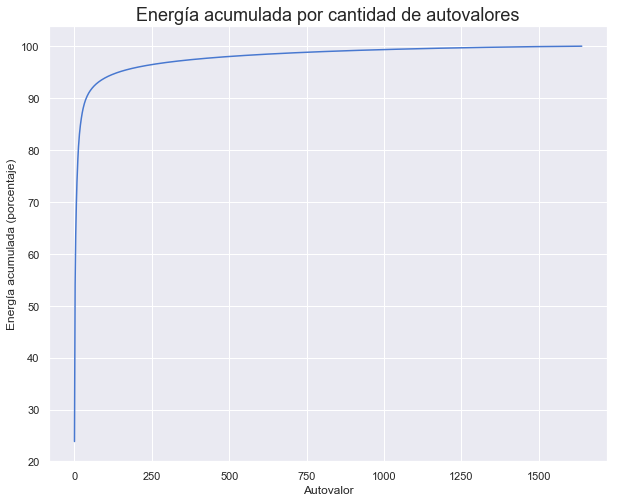

In [10]:
plt.figure(figsize=[10,8])
plt.plot(energy_for_chart)
plt.xlabel('Autovalor')
plt.ylabel('Energía acumulada (porcentaje)')
plt.title('Energía acumulada por cantidad de autovalores', size = 18)
plt.show()

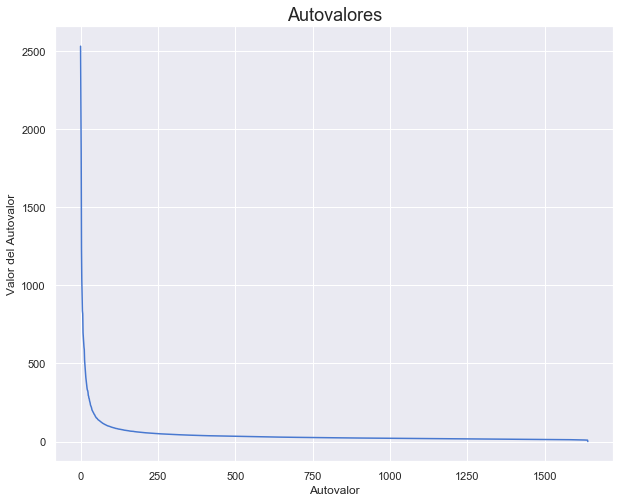

In [11]:
plt.figure(figsize=[10,8])
plt.plot(s)
plt.xlabel('Autovalor')
plt.ylabel('Valor del Autovalor')
plt.title('Autovalores', size = 18)
plt.show()

### Punto b

Hago varios graficos en detalle para ver donde esta el 'codo' 

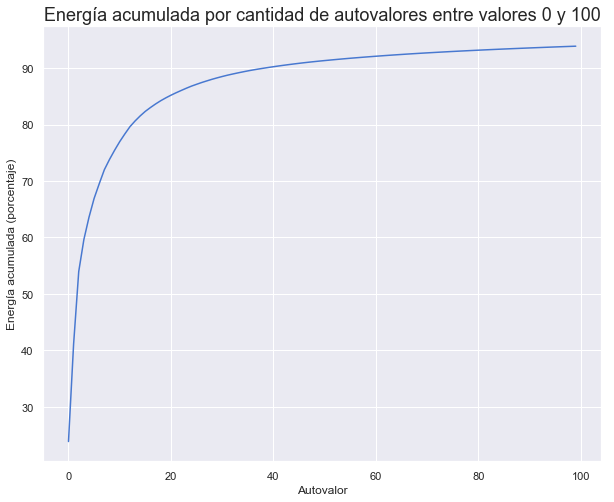

In [12]:
plt.figure(figsize=[10,8])
plt.plot(energy_for_chart[0:100])
plt.xlabel('Autovalor')
plt.ylabel('Energía acumulada (porcentaje)')
plt.title('Energía acumulada por cantidad de autovalores entre valores 0 y 100', size = 18)
plt.show()

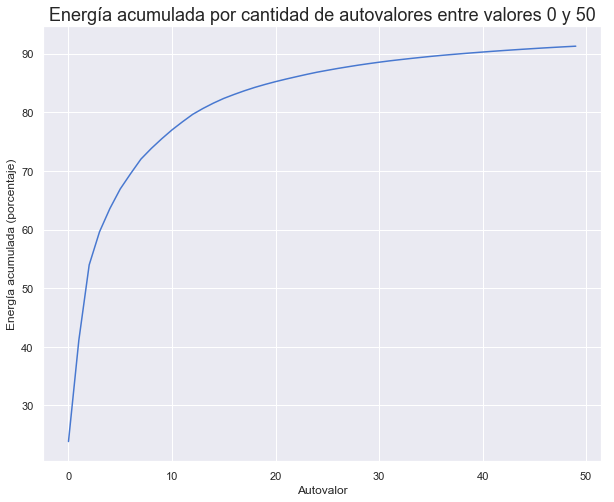

In [13]:
plt.figure(figsize=[10,8])
plt.plot(energy_for_chart[0:50])
plt.xlabel('Autovalor')
plt.ylabel('Energía acumulada (porcentaje)')
plt.title('Energía acumulada por cantidad de autovalores entre valores 0 y 50', size = 18)
plt.show()

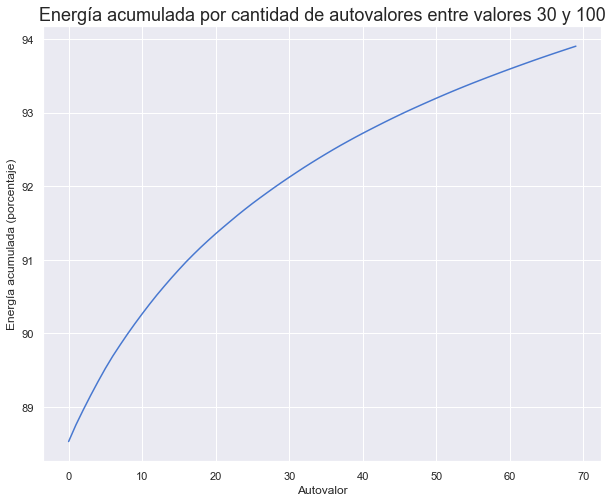

In [14]:
plt.figure(figsize=[10,8])
plt.plot(energy_for_chart[30:100])
plt.xlabel('Autovalor')
plt.ylabel('Energía acumulada (porcentaje)')
plt.title('Energía acumulada por cantidad de autovalores entre valores 30 y 100', size = 18)
plt.show()

Voy a ver los primeros 100 valores

In [15]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(pd.DataFrame(energy_for_chart[0:100]))

,0
0,23.836360
1,41.114239
2,53.965699
3,59.619525
4,63.579842
5,66.917810
6,69.522987
7,72.010927
8,73.822659
9,75.462427


Creo que con k = 40 se tendría una aproximación por lo menos decente, con el 90% de energía

### Punto c

In [19]:
u, s, vt = svds(gte, 2)

Revierto el orden

In [20]:
# https://stackoverflow.com/questions/24498854/singular-values-sorted-in-descending-order-using-svds-from-scipy-sparse-linalg
n = len(s)
u[:,:n] = u[:, n-1::-1]
s = s[::-1]
vt[:n, :] = vt[n-1::-1, :]


In [22]:
df_u = pd.DataFrame(u)

In [24]:
df_u = df_u.join(labels[['Tissue type']])
df_u.rename(columns={0:'x', 1:'y'}, inplace=True)

Text(0.5,1,'Datos representados en dos dimensiones')

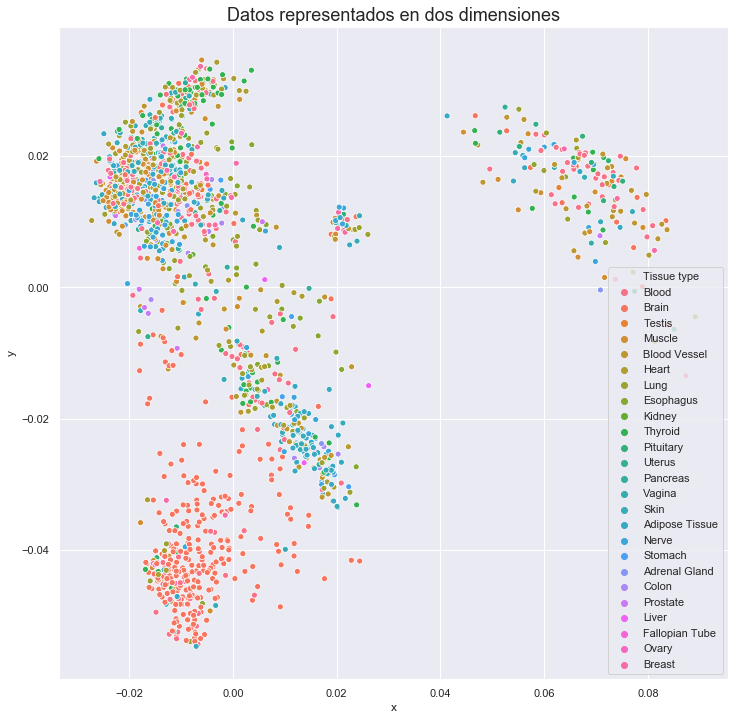

In [41]:
plt.figure(figsize=[12,12])
g = sns.scatterplot(x='x', y='y', data=df_u, hue='Tissue type')
plt.title('Datos representados en dos dimensiones', size = 18)

## Punto 2

In [28]:
from sklearn.manifold import TSNE

In [55]:
tsne = TSNE(n_components=2)
perplexity_30 = tsne.fit_transform(gte.values)

In [56]:
df_perp_30 = pd.DataFrame(perplexity_30)
df_perp_30 = df_perp_30.join(labels[['Tissue type']])
df_perp_30.rename(columns={0:'x', 1:'y'}, inplace=True)


Text(0.5,1,'TSNE con Perplexity 30')

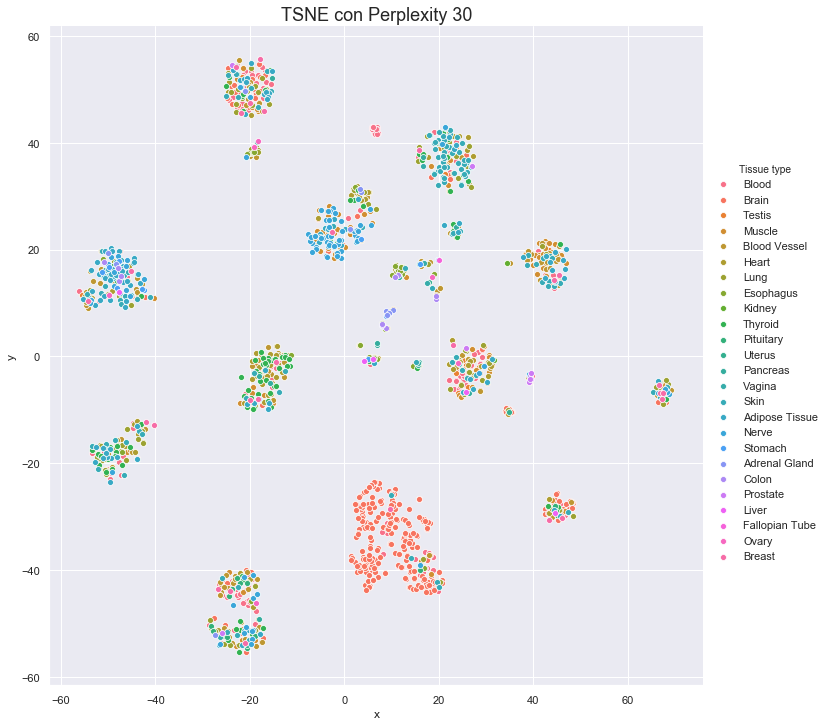

In [57]:
g = sns.pairplot(x_vars='x', y_vars='y', data=df_perp_30, hue='Tissue type', height = 10)
plt.title('TSNE con Perplexity 30', size = 18)


In [49]:
tsne = TSNE(n_components=2, perplexity = 3)
perplexity_3 = tsne.fit_transform(gte.values)

In [50]:
df_perp_3 = pd.DataFrame(perplexity_3)
df_perp_3 = df_perp_3.join(labels[['Tissue type']])
df_perp_3.rename(columns={0:'x', 1:'y'}, inplace=True)

Text(0.5,1,'TSNE con Perplexity 3')

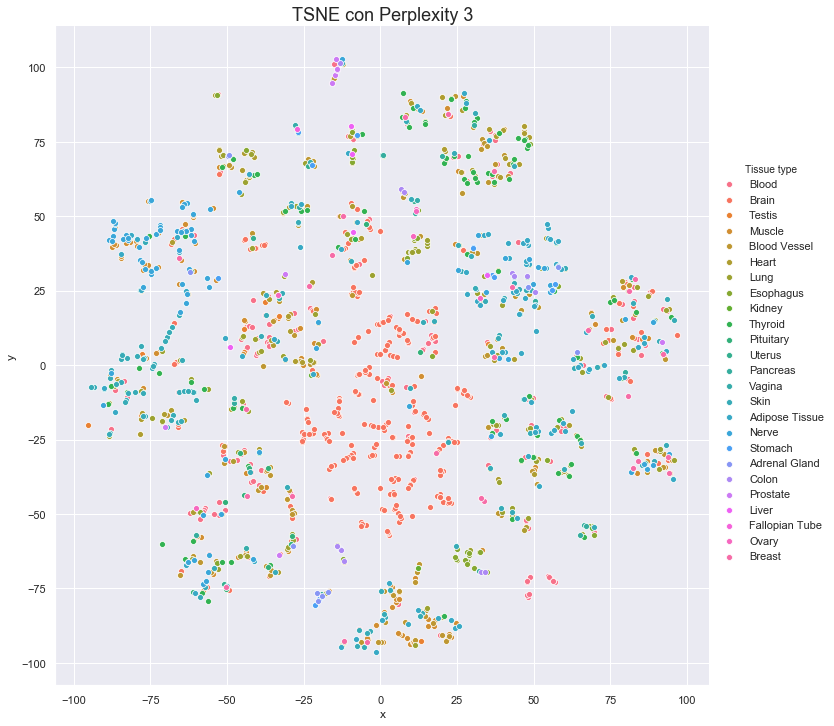

In [51]:
g = sns.pairplot(x_vars='x', y_vars='y', data=df_perp_3, hue='Tissue type', height = 10)
plt.title('TSNE con Perplexity 3', size = 18)


In [52]:
tsne = TSNE(n_components=2, perplexity = 1000)
perplexity_1000 = tsne.fit_transform(gte.values)

In [53]:
df_perp_1000 = pd.DataFrame(perplexity_1000)
df_perp_1000 = df_perp_1000.join(labels[['Tissue type']])
df_perp_1000.rename(columns={0:'x', 1:'y'}, inplace=True)

Text(0.5,1,'TSNE con Perplexity 1000')

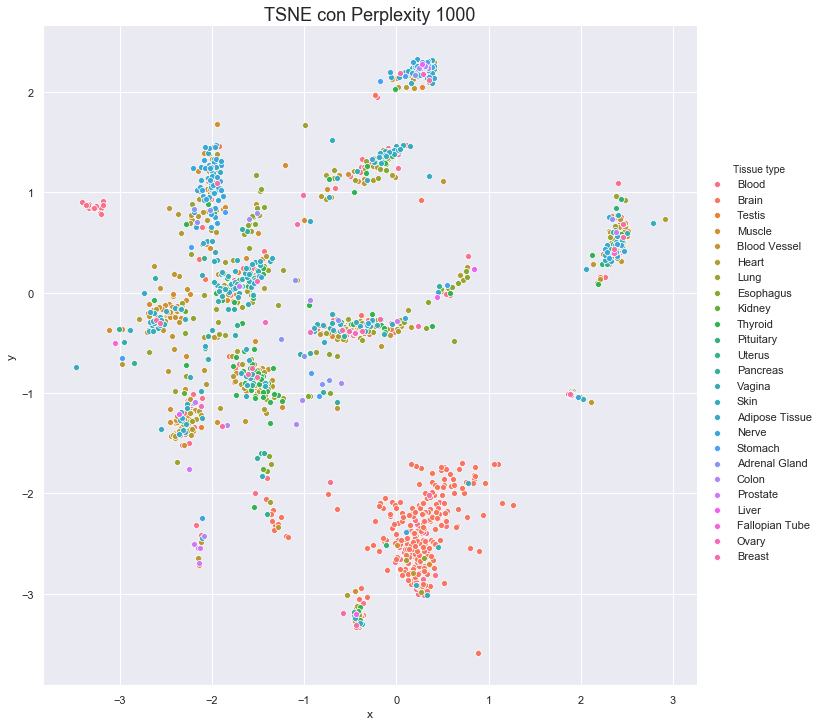

In [58]:
g = sns.pairplot(x_vars='x', y_vars='y', data=df_perp_1000, hue='Tissue type', height = 10)
plt.title('TSNE con Perplexity 1000', size = 18)


-Con perplexity 3, los puntos están muy dispersos 

-Con 1000 podemos ver grupos de puntos, pero están demasiados dispersos.

Por lo tanto es recomendable tener seteado la perplexity en un número no muy grande ni tampoco tan chico(Según la documentación, entre 5 y 50: http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html )